In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, FeatureAgglomeration, mean_shift, dbscan
from itertools import combinations

In [64]:
df_bear = pd.read_csv('bearing_final_data.csv', index_col=0)

In [65]:
df_bear

,a1_x_mean,a1_y_mean,a1_z_mean,a2_x_mean,a2_y_mean,a2_z_mean,rpm_mean,hz_mean,w_mean,a1_x_fft_mean,...,a1_z_amp_mean,a2_x_amp_mean,a2_y_amp_mean,a2_z_amp_mean,a1_x_amp_max,a1_y_amp_max,a1_z_amp_max,a2_x_amp_max,a2_y_amp_max,a2_z_amp_max
bearing_id,,,,,,,,,,,,,,,,,,,,,
2,-0.102083,-0.001759,-0.117983,-0.168055,0.029522,0.143404,293.926393,4.898773,0.169738,1.916262,...,1.369406,0.839538,1.369406,2.209345,8.392490,8.760835,5.839836,5.081550,5.839836,8.760835
3,-0.088744,0.010051,-0.117804,-0.105018,0.044259,0.120153,116.670499,1.944508,0.085521,0.993895,...,0.828252,0.507344,0.828252,1.271351,6.436616,7.017940,4.655321,3.300174,4.655321,7.017940
4,-0.093233,0.013508,-0.129507,-0.095678,0.033213,0.130490,0.000000,0.000000,0.000360,0.254568,...,0.396418,0.288777,0.396418,0.548639,1.134978,1.395305,1.130811,1.087983,1.130811,1.395305
5,-0.078714,0.023931,-0.129994,-0.067206,0.033905,0.149967,0.000000,0.000000,0.000369,0.238919,...,0.381700,0.320147,0.381700,0.560753,0.944392,1.366012,0.954090,1.087899,0.954090,1.366012
6,-0.055986,0.027388,-0.110634,0.409347,0.056331,0.211110,166.692059,2.778201,0.099480,1.037147,...,0.899986,1.095742,0.899986,1.160802,10.426675,6.777563,5.724444,8.655746,5.724444,6.777563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-0.151900,0.000386,-0.039058,-0.695888,0.015092,0.117469,0.000000,0.000000,0.000376,0.755179,...,0.924986,0.417588,0.924986,0.760174,1.705478,1.687074,1.604986,1.231418,1.604986,1.687074
97,-0.158082,-0.001204,-0.042925,-0.664974,0.008377,0.007673,0.000000,0.000000,0.000373,0.851252,...,0.842795,0.473330,0.842795,0.691708,1.899214,1.574176,1.620963,1.234687,1.620963,1.574176
98,-0.146641,-0.001280,-0.020978,-0.633154,0.014734,0.043413,1.907138,0.031786,0.020169,0.753391,...,0.843249,0.460474,0.843249,0.691485,4.921217,2.897686,2.563624,2.398158,2.563624,2.897686


## KMeans Clustering

In [95]:
df_vib_amp = df_bear['a2_x_mean'].to_frame().join(df_bear['a2_x_amp_max'].to_frame())
df_vib_amp = df_vib_amp.reset_index()

Silhouette score: 0
[5 5 5 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 6 6 6 6 6 6 6 6 6 3
 3 6 6 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 7 7 7 7 7
 7 7 7 7 7 7 2 7 7 2 2 4 2 4 2 4 4 4 4 2 4 4 4 4 4]


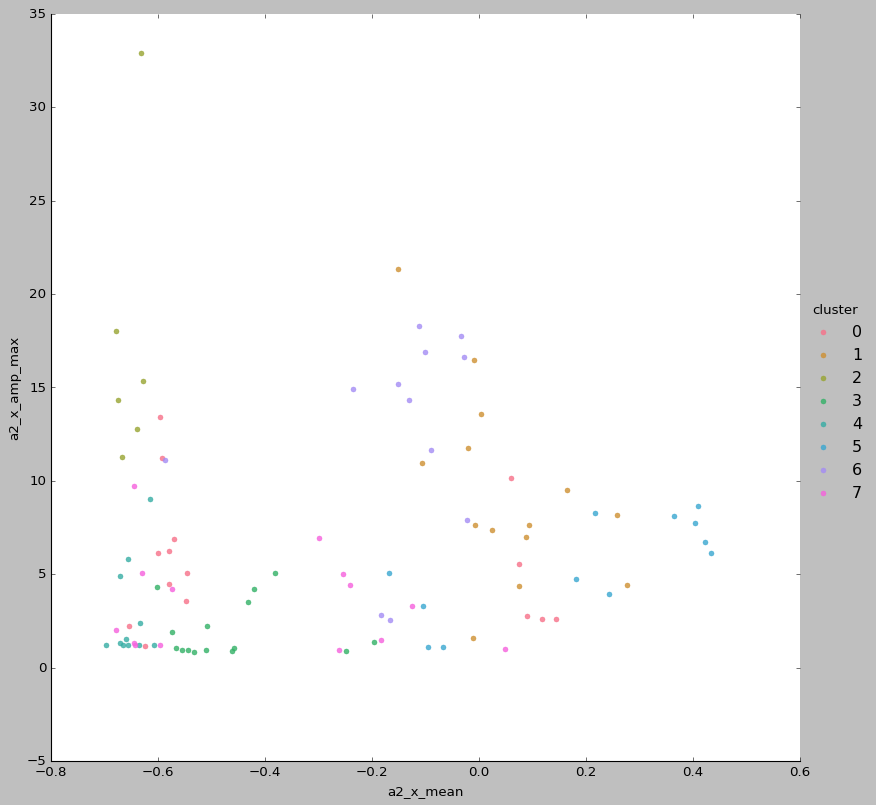

In [96]:
# fit a kmeans object to the dataset
kmeans = KMeans(init='k-means++').fit(df_vib_amp)

# labels and clusters are attributes of the object
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# add cluster index to dataframe
cluster_labels = pd.Series(labels, name='cluster')
df_vib_amp = df_vib_amp.join(cluster_labels.to_frame())

# Score
print("Silhouette score: %d" %silhouette_score(df_vib_amp, labels))
print(labels)

# visualize clusters
plt.style.use('classic')
sns.lmplot(x='a2_x_mean', y='a2_x_amp_max',  height=10, data=df_vib_amp,
           fit_reg=False, hue='cluster')
plt.grid(False)
plt.show()

### Silhouette Score follow-up

In [68]:
arr = ['a2_x_mean', 'a2_y_mean', 'a2_z_mean', 'a2_x_fft_mean', 'a2_y_fft_mean', 'a2_z_fft_mean', 'a2_x_amp_mean', 'a2_y_amp_mean', 'a2_z_amp_mean', 'a2_x_amp_max', 'a2_y_amp_max', 'a2_z_amp_max']
r = 2
def iter_feature(arr, r):
    return list(combinations(arr, r))

feature_comb = iter_feature(arr,r)

In [94]:
print(feature_comb)

[('a2_x_mean', 'a2_y_mean'), ('a2_x_mean', 'a2_z_mean'), ('a2_x_mean', 'a2_x_fft_mean'), ('a2_x_mean', 'a2_y_fft_mean'), ('a2_x_mean', 'a2_z_fft_mean'), ('a2_x_mean', 'a2_x_amp_mean'), ('a2_x_mean', 'a2_y_amp_mean'), ('a2_x_mean', 'a2_z_amp_mean'), ('a2_x_mean', 'a2_x_amp_max'), ('a2_x_mean', 'a2_y_amp_max'), ('a2_x_mean', 'a2_z_amp_max'), ('a2_y_mean', 'a2_z_mean'), ('a2_y_mean', 'a2_x_fft_mean'), ('a2_y_mean', 'a2_y_fft_mean'), ('a2_y_mean', 'a2_z_fft_mean'), ('a2_y_mean', 'a2_x_amp_mean'), ('a2_y_mean', 'a2_y_amp_mean'), ('a2_y_mean', 'a2_z_amp_mean'), ('a2_y_mean', 'a2_x_amp_max'), ('a2_y_mean', 'a2_y_amp_max'), ('a2_y_mean', 'a2_z_amp_max'), ('a2_z_mean', 'a2_x_fft_mean'), ('a2_z_mean', 'a2_y_fft_mean'), ('a2_z_mean', 'a2_z_fft_mean'), ('a2_z_mean', 'a2_x_amp_mean'), ('a2_z_mean', 'a2_y_amp_mean'), ('a2_z_mean', 'a2_z_amp_mean'), ('a2_z_mean', 'a2_x_amp_max'), ('a2_z_mean', 'a2_y_amp_max'), ('a2_z_mean', 'a2_z_amp_max'), ('a2_x_fft_mean', 'a2_y_fft_mean'), ('a2_x_fft_mean', 'a2_z_

In [69]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for index, tup in enumerate(feature_comb):
    element_one = tup[0]
    element_two = tup[1]
    df_vib_amp = df_bear[element_one].to_frame().join(df_bear[element_two].to_frame())
    df_vib_amp = df_vib_amp.reset_index()
    print(f"Features: {element_one} and {element_two}")

    # Generating the sample data from make_blobs
    # This particular setting has one distinct cluster and 3 clusters placed close
    # together.
    X = df_vib_amp
    range_n_clusters = [2, 3, 4, 5, 6, 7]
    for n_clusters in range_n_clusters:
            # Create a subplot with 1 row and 2 columns
        #fig, (ax1, ax2) = plt.subplots(1, 2)
        #fig.set_size_inches(18, 7)
        #    # The 1st subplot is the silhouette plot
        #    # The silhouette coefficient can range from -1, 1 but in this example all
        #    # lie within [-0.1, 1]
        #ax1.set_xlim([-0.1, 1])
        #    # The (n_clusters+1)*10 is for inserting blank space between silhouette
        #    # plots of individual clusters, to demarcate them clearly.
        #ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
            # Initialize the clusterer with n_clusters value and a random generator
                # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=10)
        cluster_labels = clusterer.fit_predict(X)
                # The silhouette_score gives the average value for all the samples.
            # This gives a perspective into the density and separation of the formed
            # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
            # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        y_lower = 10
        '''
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        ax2.set_yticks([15,20,25,30,35,40,45,50])  # Clear the yaxis labels / ticks
        ax2.set_xticks([-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8])
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(df_vib_amp[element_one], df_vib_amp[element_two], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
        #            c="white", alpha=1, s=200, edgecolor='k')
    #
        #for i, c in enumerate(centers):
        #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
        #                s=50, edgecolor='k')
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')'''

Features: a2_x_mean and a2_y_mean
For n_clusters = 2 The average silhouette_score is : 0.6190691400038687
For n_clusters = 3 The average silhouette_score is : 0.5775625081637197
For n_clusters = 4 The average silhouette_score is : 0.5546108047149884
For n_clusters = 5 The average silhouette_score is : 0.5387510595611636
For n_clusters = 6 The average silhouette_score is : 0.5269876506442603
For n_clusters = 7 The average silhouette_score is : 0.516741578552352
Features: a2_x_mean and a2_z_mean
For n_clusters = 2 The average silhouette_score is : 0.6190531059636648
For n_clusters = 3 The average silhouette_score is : 0.5775332635351991
For n_clusters = 4 The average silhouette_score is : 0.5545560126438546
For n_clusters = 5 The average silhouette_score is : 0.5377237135514846
For n_clusters = 6 The average silhouette_score is : 0.5268953248832376
For n_clusters = 7 The average silhouette_score is : 0.5166048792342203
Features: a2_x_mean and a2_x_fft_mean
For n_clusters = 2 The average 

Features: a2_x_mean and a2_z_mean
For n_clusters = 2 The average silhouette_score is : 0.6190531059636648
For n_clusters = 3 The average silhouette_score is : 0.5775332635351991
For n_clusters = 4 The average silhouette_score is : 0.5545560126438546
For n_clusters = 5 The average silhouette_score is : 0.5377237135514846
For n_clusters = 6 The average silhouette_score is : 0.5268953248832376
For n_clusters = 7 The average silhouette_score is : 0.5166048792342203


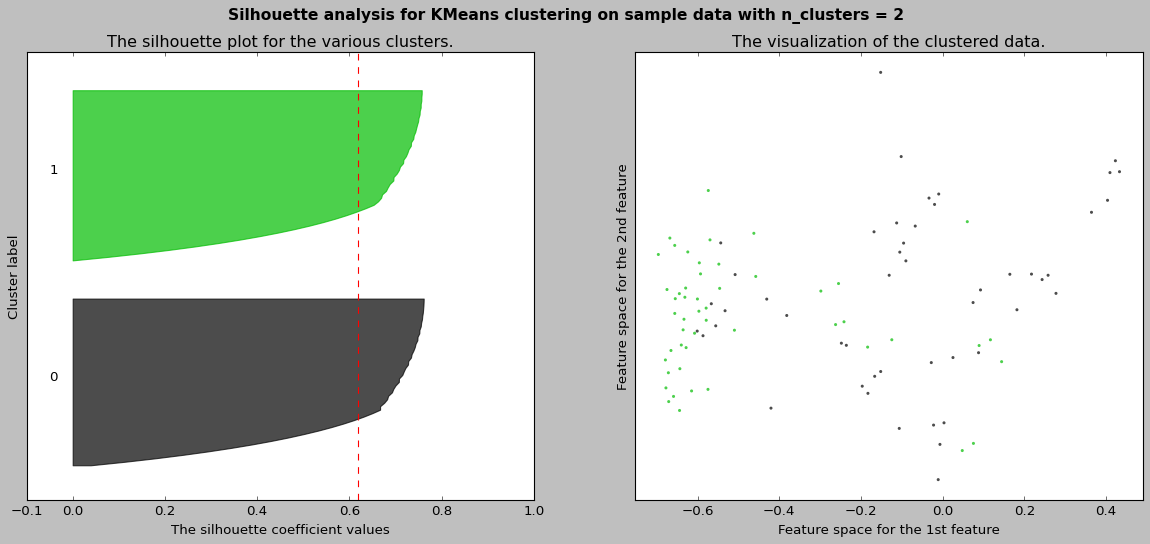

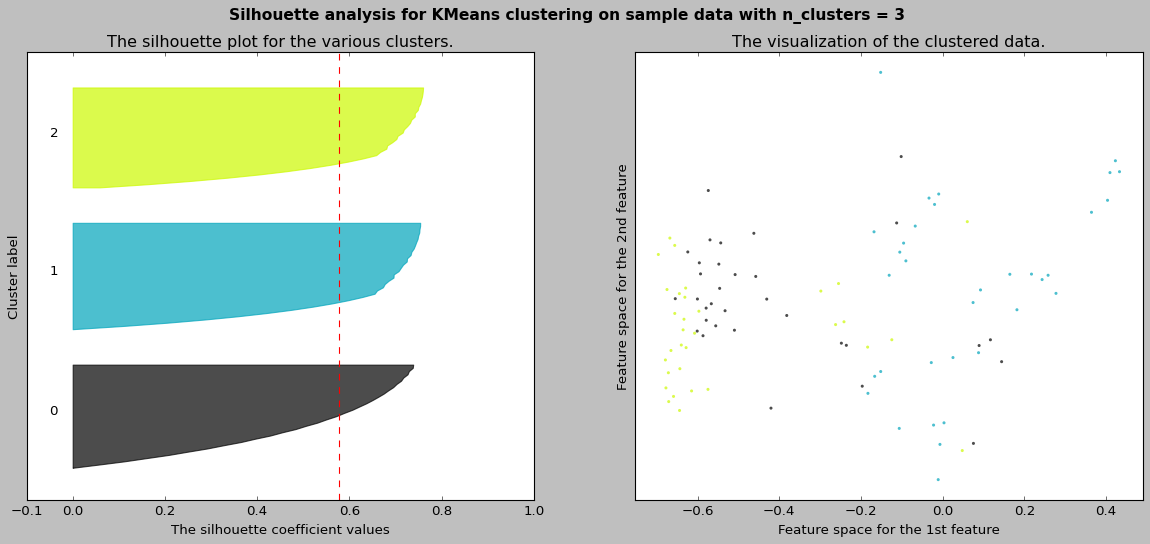

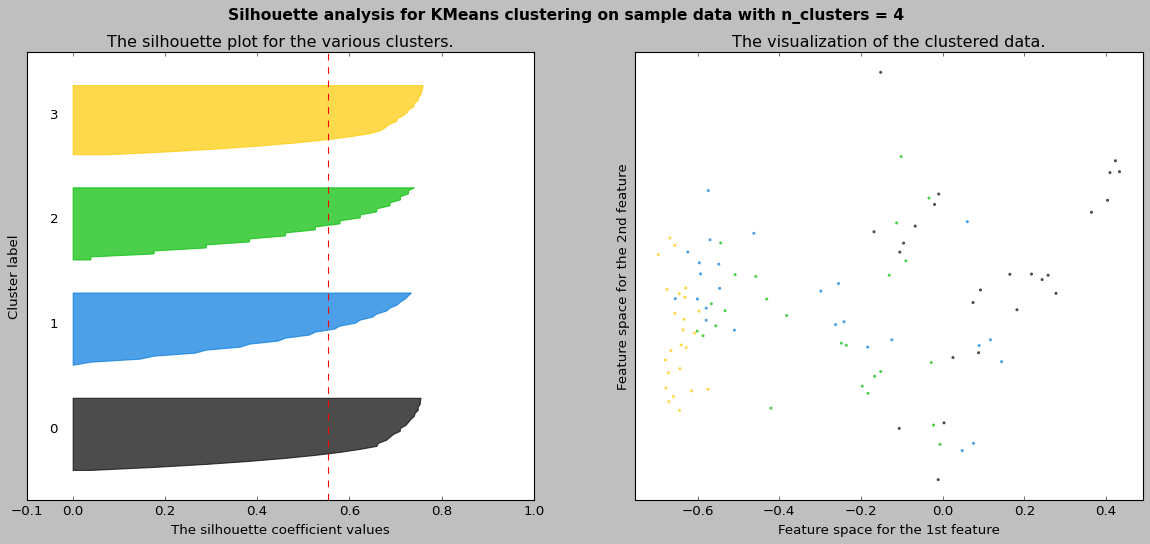

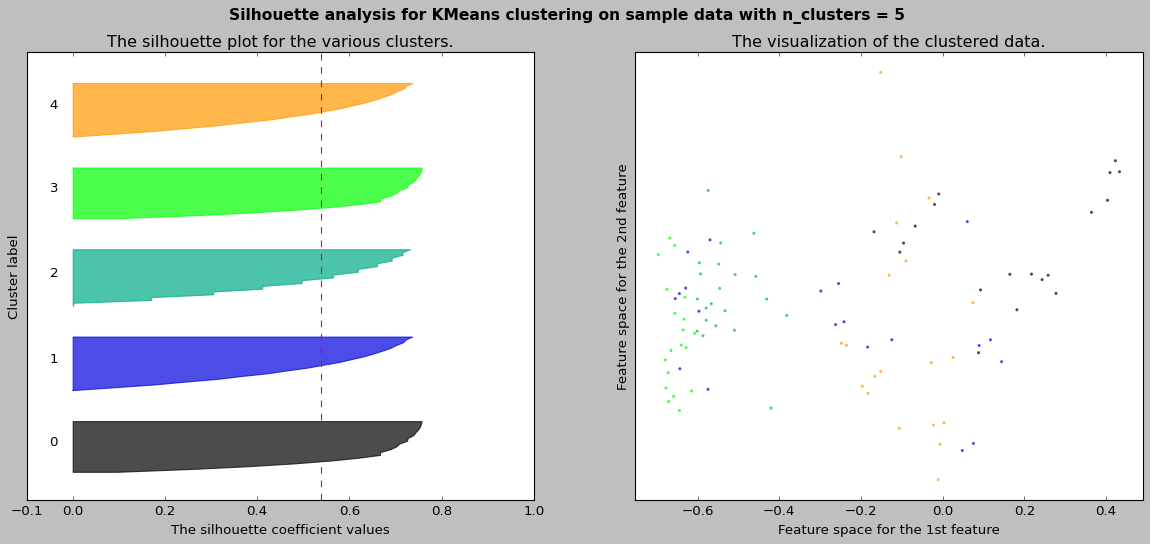

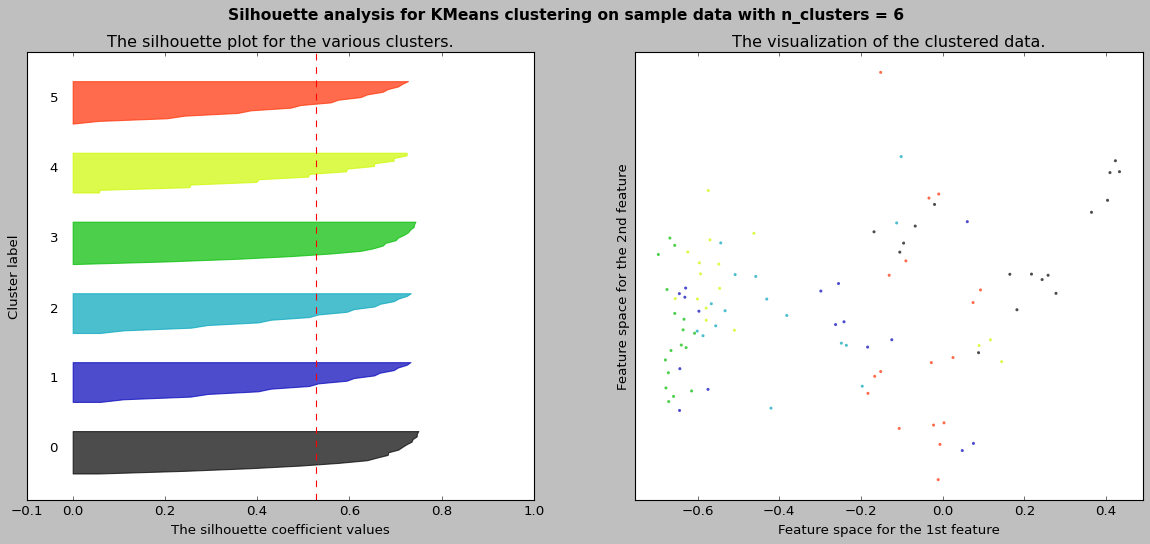

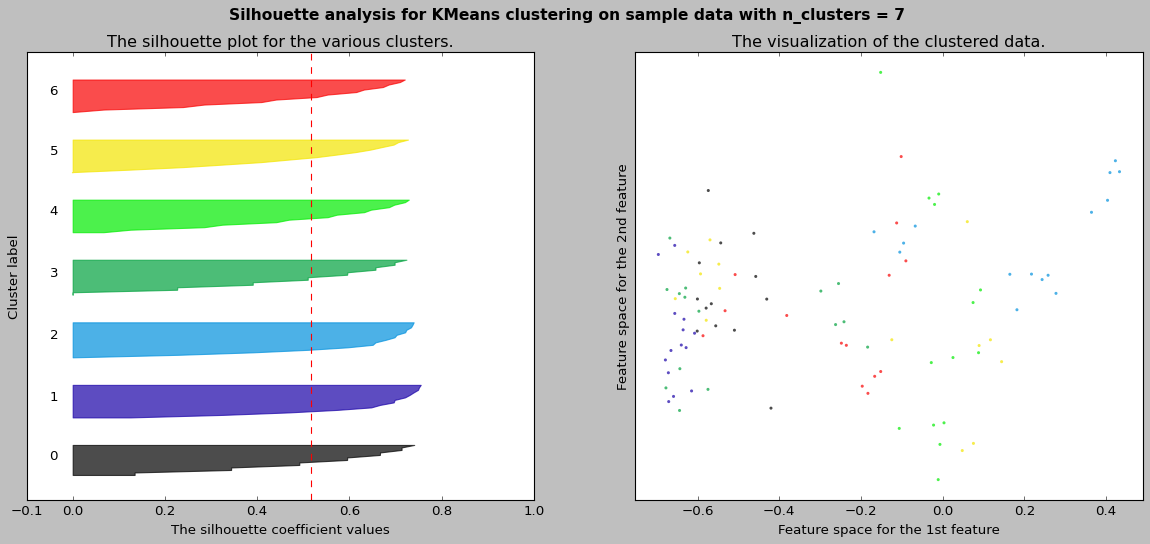

In [83]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

df_vib_amp = df_bear['a2_x_mean'].to_frame().join(df_bear['a2_z_mean'].to_frame())
df_vib_amp = df_vib_amp.reset_index()
print(f"Features: a2_x_mean and a2_z_mean")

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = df_vib_amp
range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    #    # The 1st subplot is the silhouette plot
    #    # The silhouette coefficient can range from -1, 1 but in this example all
    #    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    #    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    #    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        # Initialize the clusterer with n_clusters value and a random generator
            # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=10)
    cluster_labels = clusterer.fit_predict(X)
            # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
        # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax2.set_yticks([15,20,25,30,35,40,45,50])  # Clear the yaxis labels / ticks
    ax2.set_xticks([-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_vib_amp['a2_x_mean'], df_vib_amp['a2_z_mean'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
    #            c="white", alpha=1, s=200, edgecolor='k')
#
    #for i, c in enumerate(centers):
    #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
    #                s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [71]:
array = ['a2_y_mean', 'a2_x_fft_mean', 'a2_y_fft_mean', 'a2_z_fft_mean', 'a2_x_amp_mean', 'a2_y_amp_mean', 'a2_z_amp_mean', 'a2_x_amp_max', 'a2_y_amp_max', 'a2_z_amp_max']

In [72]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for element in array:
    df_vib_amp = df_bear['a2_x_mean'].to_frame().join(df_bear['a2_z_mean'].to_frame()).join(df_bear[element].to_frame())
    df_vib_amp = df_vib_amp.reset_index()
    print(f"Features: a2_x_mean and a2_z_mean and {element}")

    # Generating the sample data from make_blobs
    # This particular setting has one distinct cluster and 3 clusters placed close
    # together.
    X = df_vib_amp
    range_n_clusters = [2, 3, 4, 5, 6, 7]
    for n_clusters in range_n_clusters:
            # Create a subplot with 1 row and 2 columns
        #fig, (ax1, ax2) = plt.subplots(1, 2)
        #fig.set_size_inches(18, 7)
        #    # The 1st subplot is the silhouette plot
        #    # The silhouette coefficient can range from -1, 1 but in this example all
        #    # lie within [-0.1, 1]
        #ax1.set_xlim([-0.1, 1])
        #    # The (n_clusters+1)*10 is for inserting blank space between silhouette
        #    # plots of individual clusters, to demarcate them clearly.
        #ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
            # Initialize the clusterer with n_clusters value and a random generator
                # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=10)
        cluster_labels = clusterer.fit_predict(X)
                # The silhouette_score gives the average value for all the samples.
            # This gives a perspective into the density and separation of the formed
            # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
            # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        y_lower = 10
        '''
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        ax2.set_yticks([15,20,25,30,35,40,45,50])  # Clear the yaxis labels / ticks
        ax2.set_xticks([-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8])
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(df_vib_amp[element_one], df_vib_amp[element_two], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
        #            c="white", alpha=1, s=200, edgecolor='k')
    #
        #for i, c in enumerate(centers):
        #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
        #                s=50, edgecolor='k')
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')'''

Features: a2_x_mean and a2_z_mean and a2_y_mean
For n_clusters = 2 The average silhouette_score is : 0.6190515641525413
For n_clusters = 3 The average silhouette_score is : 0.5775303000029566
For n_clusters = 4 The average silhouette_score is : 0.5545508879975222
For n_clusters = 5 The average silhouette_score is : 0.5377191241674084
For n_clusters = 6 The average silhouette_score is : 0.5268862832622057
For n_clusters = 7 The average silhouette_score is : 0.5165934095934835
Features: a2_x_mean and a2_z_mean and a2_x_fft_mean
For n_clusters = 2 The average silhouette_score is : 0.617688935366186
For n_clusters = 3 The average silhouette_score is : 0.5753610147871785
For n_clusters = 4 The average silhouette_score is : 0.5496422407816208
For n_clusters = 5 The average silhouette_score is : 0.5341017606310988
For n_clusters = 6 The average silhouette_score is : 0.5187724890855325
For n_clusters = 7 The average silhouette_score is : 0.5087513702678332
Features: a2_x_mean and a2_z_mean and

In [73]:
array_4 = ['a2_x_fft_mean', 'a2_y_fft_mean', 'a2_z_fft_mean', 'a2_x_amp_mean', 'a2_y_amp_mean', 'a2_z_amp_mean', 'a2_x_amp_max', 'a2_y_amp_max', 'a2_z_amp_max']

In [74]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for element in array_4:
    df_vib_amp = df_bear['a2_x_mean'].to_frame().join(df_bear['a2_y_mean'].to_frame()).join(df_bear['a2_z_mean'].to_frame()).join(df_bear[element].to_frame())
    df_vib_amp = df_vib_amp.reset_index()
    print(f"Features: a2_x_mean and a2_y_mean and a2_z_mean and {element}")

    # Generating the sample data from make_blobs
    # This particular setting has one distinct cluster and 3 clusters placed close
    # together.
    X = df_vib_amp
    range_n_clusters = [2, 3, 4, 5, 6, 7]
    for n_clusters in range_n_clusters:
            # Create a subplot with 1 row and 2 columns
        #fig, (ax1, ax2) = plt.subplots(1, 2)
        #fig.set_size_inches(18, 7)
        #    # The 1st subplot is the silhouette plot
        #    # The silhouette coefficient can range from -1, 1 but in this example all
        #    # lie within [-0.1, 1]
        #ax1.set_xlim([-0.1, 1])
        #    # The (n_clusters+1)*10 is for inserting blank space between silhouette
        #    # plots of individual clusters, to demarcate them clearly.
        #ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
            # Initialize the clusterer with n_clusters value and a random generator
                # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=10)
        cluster_labels = clusterer.fit_predict(X)
                # The silhouette_score gives the average value for all the samples.
            # This gives a perspective into the density and separation of the formed
            # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
            # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        y_lower = 10
        '''
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        ax2.set_yticks([15,20,25,30,35,40,45,50])  # Clear the yaxis labels / ticks
        ax2.set_xticks([-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8])
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(df_vib_amp[element_one], df_vib_amp[element_two], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
        #            c="white", alpha=1, s=200, edgecolor='k')
    #
        #for i, c in enumerate(centers):
        #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
        #                s=50, edgecolor='k')
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')'''

Features: a2_x_mean and a2_y_mean and a2_z_mean and a2_x_fft_mean
For n_clusters = 2 The average silhouette_score is : 0.6176874696231456
For n_clusters = 3 The average silhouette_score is : 0.5753582050449702
For n_clusters = 4 The average silhouette_score is : 0.5496373650263844
For n_clusters = 5 The average silhouette_score is : 0.5340974400806507
For n_clusters = 6 The average silhouette_score is : 0.5187642052675258
For n_clusters = 7 The average silhouette_score is : 0.508740708184565
Features: a2_x_mean and a2_y_mean and a2_z_mean and a2_y_fft_mean
For n_clusters = 2 The average silhouette_score is : 0.6172316195524954
For n_clusters = 3 The average silhouette_score is : 0.5744471203074063
For n_clusters = 4 The average silhouette_score is : 0.5482337454478938
For n_clusters = 5 The average silhouette_score is : 0.531631173887937
For n_clusters = 6 The average silhouette_score is : 0.5165728773975462
For n_clusters = 7 The average silhouette_score is : 0.5045800425035731
Featur

In [75]:
array_5 = ['a2_y_fft_mean', 'a2_z_fft_mean', 'a2_x_amp_mean', 'a2_y_amp_mean', 'a2_z_amp_mean', 'a2_x_amp_max', 'a2_y_amp_max', 'a2_z_amp_max']

In [76]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for element in array_5:
    df_vib_amp = df_bear['a2_x_mean'].to_frame().join(df_bear['a2_y_mean'].to_frame()).join(df_bear['a2_z_mean'].to_frame()).join(df_bear['a2_x_fft_mean'].to_frame()).join(df_bear[element].to_frame())
    df_vib_amp = df_vib_amp.reset_index()
    print(f"Features: a2_x_mean and a2_y_mean and a2_z_mean and a2_x_fft_mean and {element}")

    # Generating the sample data from make_blobs
    # This particular setting has one distinct cluster and 3 clusters placed close
    # together.
    X = df_vib_amp
    range_n_clusters = [2, 3, 4, 5, 6, 7]
    for n_clusters in range_n_clusters:
            # Create a subplot with 1 row and 2 columns
        #fig, (ax1, ax2) = plt.subplots(1, 2)
        #fig.set_size_inches(18, 7)
        #    # The 1st subplot is the silhouette plot
        #    # The silhouette coefficient can range from -1, 1 but in this example all
        #    # lie within [-0.1, 1]
        #ax1.set_xlim([-0.1, 1])
        #    # The (n_clusters+1)*10 is for inserting blank space between silhouette
        #    # plots of individual clusters, to demarcate them clearly.
        #ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
            # Initialize the clusterer with n_clusters value and a random generator
                # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=10)
        cluster_labels = clusterer.fit_predict(X)
                # The silhouette_score gives the average value for all the samples.
            # This gives a perspective into the density and separation of the formed
            # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
            # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        y_lower = 10
        '''
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        ax2.set_yticks([15,20,25,30,35,40,45,50])  # Clear the yaxis labels / ticks
        ax2.set_xticks([-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8])
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(df_vib_amp[element_one], df_vib_amp[element_two], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
        #            c="white", alpha=1, s=200, edgecolor='k')
    #
        #for i, c in enumerate(centers):
        #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
        #                s=50, edgecolor='k')
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')'''

Features: a2_x_mean and a2_y_mean and a2_z_mean and a2_x_fft_mean and a2_y_fft_mean
For n_clusters = 2 The average silhouette_score is : 0.6160989188067996
For n_clusters = 3 The average silhouette_score is : 0.5725672058258322
For n_clusters = 4 The average silhouette_score is : 0.5450660580964783
For n_clusters = 5 The average silhouette_score is : 0.5285524798036736
For n_clusters = 6 The average silhouette_score is : 0.5106436524089134
For n_clusters = 7 The average silhouette_score is : 0.4981706517982696
Features: a2_x_mean and a2_y_mean and a2_z_mean and a2_x_fft_mean and a2_z_fft_mean
For n_clusters = 2 The average silhouette_score is : 0.6158564941116985
For n_clusters = 3 The average silhouette_score is : 0.572200520558557
For n_clusters = 4 The average silhouette_score is : 0.5443703570718585
For n_clusters = 5 The average silhouette_score is : 0.5279163580403323
For n_clusters = 6 The average silhouette_score is : 0.5102374064718421
For n_clusters = 7 The average silhouette

In [77]:
array_6 = ['a2_y_fft_mean', 'a2_x_amp_mean', 'a2_y_amp_mean', 'a2_z_amp_mean', 'a2_x_amp_max', 'a2_y_amp_max', 'a2_z_amp_max']

In [78]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for element in array_6:
    df_vib_amp = df_bear['a2_x_mean'].to_frame().join(df_bear['a2_y_mean'].to_frame()).join(df_bear['a2_z_mean'].to_frame()).join(df_bear['a2_x_fft_mean'].to_frame()).join(df_bear['a2_z_fft_mean'].to_frame()).join(df_bear[element].to_frame())
    df_vib_amp = df_vib_amp.reset_index()
    print(f"Features: a2_x_mean and a2_y_mean and a2_z_mean and a2_x_fft_mean and a2_z_fft_mean and {element}")

    # Generating the sample data from make_blobs
    # This particular setting has one distinct cluster and 3 clusters placed close
    # together.
    X = df_vib_amp
    range_n_clusters = [2, 3, 4, 5, 6, 7]
    for n_clusters in range_n_clusters:
            # Create a subplot with 1 row and 2 columns
        #fig, (ax1, ax2) = plt.subplots(1, 2)
        #fig.set_size_inches(18, 7)
        #    # The 1st subplot is the silhouette plot
        #    # The silhouette coefficient can range from -1, 1 but in this example all
        #    # lie within [-0.1, 1]
        #ax1.set_xlim([-0.1, 1])
        #    # The (n_clusters+1)*10 is for inserting blank space between silhouette
        #    # plots of individual clusters, to demarcate them clearly.
        #ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
            # Initialize the clusterer with n_clusters value and a random generator
                # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=10)
        cluster_labels = clusterer.fit_predict(X)
                # The silhouette_score gives the average value for all the samples.
            # This gives a perspective into the density and separation of the formed
            # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
            # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        y_lower = 10
        '''
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        ax2.set_yticks([15,20,25,30,35,40,45,50])  # Clear the yaxis labels / ticks
        ax2.set_xticks([-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8])
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(df_vib_amp[element_one], df_vib_amp[element_two], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
        #            c="white", alpha=1, s=200, edgecolor='k')
    #
        #for i, c in enumerate(centers):
        #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
        #                s=50, edgecolor='k')
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')'''

Features: a2_x_mean and a2_y_mean and a2_z_mean and a2_x_fft_mean and a2_z_fft_mean and a2_y_fft_mean
For n_clusters = 2 The average silhouette_score is : 0.6144598785988963
For n_clusters = 3 The average silhouette_score is : 0.5698602502838936
For n_clusters = 4 The average silhouette_score is : 0.5405742356872105
For n_clusters = 5 The average silhouette_score is : 0.5235371537207315
For n_clusters = 6 The average silhouette_score is : 0.5030822690784389
For n_clusters = 7 The average silhouette_score is : 0.48922519321949587
Features: a2_x_mean and a2_y_mean and a2_z_mean and a2_x_fft_mean and a2_z_fft_mean and a2_x_amp_mean
For n_clusters = 2 The average silhouette_score is : 0.6148246251609861
For n_clusters = 3 The average silhouette_score is : 0.5705507526986345
For n_clusters = 4 The average silhouette_score is : 0.5415960867975994
For n_clusters = 5 The average silhouette_score is : 0.5252706437038839
For n_clusters = 6 The average silhouette_score is : 0.5058504028116297
For

In [79]:
num_clusters = np.arange(2,8)
print(num_clusters)

[2 3 4 5 6 7]


In [84]:
scores_2_feat = [0.6190531059636648,0.5775332635351991,0.5545560126438546,0.5377237135514846,0.5268953248832376,0.5166048792342203]
scores_3_feat = [0.6185202303993942,0.5765327496751518,0.5528574390662281,0.5369145266984755,0.5238678602174942,0.512377013008427]
scores_4_feat = [0.6164868634004139,0.5733619037988797,0.5463003083101764,0.5293495499541816,0.5159713210246866,0.4997217930780929]
scores_5_feat = [0.6146942490498364,0.5707324453883413,0.5413648009702641,0.5243917278414285,0.5101974928706712,0.4918545925328513]
scores_6_feat = [0.6129248901207173,0.5687977113121171,0.5365745185042812,0.5190340658704269,0.5047063681260266,0.48516446358873805]

(0.0, 1.0)

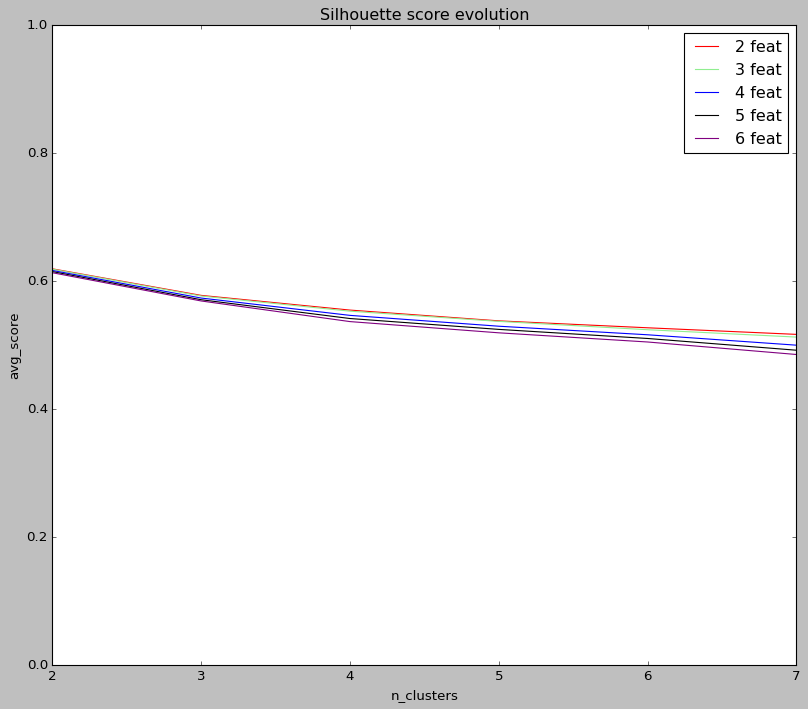

In [85]:
plt.figure(figsize=(12,10))
plt.plot(num_clusters, scores_2_feat, c='red', label='2 feat')
plt.plot(num_clusters, scores_3_feat, c='lightgreen', label='3 feat')
plt.plot(num_clusters, scores_4_feat, c='blue', label='4 feat')
plt.plot(num_clusters, scores_5_feat, c='black', label='5 feat')
plt.plot(num_clusters, scores_6_feat, c='purple', label='6 feat')
plt.legend()
plt.title('Silhouette score evolution')
plt.xlabel('n_clusters')
plt.ylabel('avg_score')
plt.xlim([2,7])
plt.ylim([0,1])